## NYC Citi Bike System Data Analysis

For this assignment, I downloaded the data and uploaded it to my own PostgreSQL database as Google Big Query public dataset did not have all the data for each month available within the 2016-2017 time period.

1. A set of SQL queries you used to explore the underlying data
2. A Python script that includes deeper analyses of the data
3. Visualizations, key findings, and a set of written recommendations which summarize your analysis and offer next steps for the business

Based on the requirements, my assumptions were the following: 

* Use SQL to reduce the large dataset into more manageable datasets to obtain specific metrics for business
* Utilize Python data analysis libraries (Pandas, matplotlib, seaborn) to further cleanse the data and present visualizations 
* Briefly explain what's the purpose of each metric and how it can help business make a data driven descision


Before uploading, I noticed that there were a few empty values within the "birth year" column. The data cannot be uploaded with CSV files unless the value was filled with a "null" word. In my case, I used the simple loop below to have each file read as a dataframe and filled with the "null" word in order to create a new file for data upload

In [1]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
%matplotlib inline

In [2]:
# #Interates through the years and months in order fill the null values within "birth year" column of each file"
# for i in range(2016,2018):
#     for j in range(1,13):
#         if j < 10:
#             df = pd.read_csv(str(i) + "0" + str(j) +"-citibike-tripdata.csv")
#             df["birth year"].fillna("null", inplace = True) 
#             df.to_csv( str(i) + "0" + str(j) + '.csv', index=False)
#         else:
#             df = pd.read_csv(str(i) + str(j) +"-citibike-tripdata.csv")
#             df["birth year"].fillna("null", inplace = True) 
#             df.to_csv( str(i) +  str(j) + '.csv', index=False)

## Exploring the Data

### Number of Trips throughout the Time Periods

The number of trips is the main focus as it can determine how the users are utilizing the bike system. I believed that it was important to assess whether there were certain time periods that had more bike usage then other time periods? 


**What is the trend of the usage of the bike system throughout months?**

The best way to determine trends was to use a line graph. When the number of trips were plotted against months, I determined which months were the peak seasons for users to use the bike system. By understanding this trend, I determined how the bike system was growing over multiple years and what peak times would be beneficial to increase bike placement over the city. 

*Query Used*

'SELECT Date(starttime) as Date, COUNT(*) AS num_trips from bike WHERE extract(year from starttime) = 2016 or extract(year from starttime) = 2017 group by Date(starttime)'


<Figure size 1440x720 with 0 Axes>

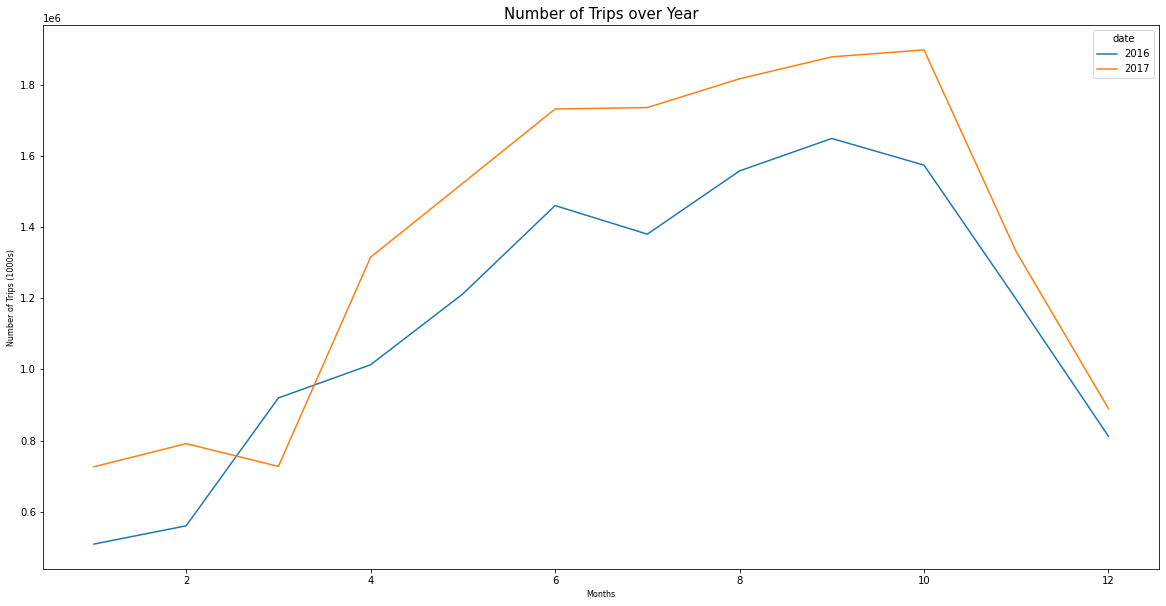

<Figure size 1440x720 with 0 Axes>

In [3]:
#importing CSV
trips = pd.read_csv('Trips Per Month.csv')
trips.index = pd.to_datetime(trips['date'])
trips.groupby(by=[trips.index.month, trips.index.year])['num_trips'].sum()
trips = pd.pivot_table(trips, index=trips.index.month, columns=trips.index.year,
                    values='num_trips', aggfunc='sum')

#adjusting the plot features
trips.plot(figsize = (20,10))
plt.title("Number of Trips over Year", fontsize = 15)
plt.xlabel("Months", fontsize = 8)
plt.ylabel("Number of Trips (1000s)", fontsize = 8)
plt.figure(figsize = (20,10))

### Observations

Since New York City contains all 4 weather seasons, there are some popular time periods for the bike system. The spring season began in April, allowing for warmer temperatures and less snow covering the ground for bikes to operate. Usage steadily increases over the summer season just until the fall season, which begins around the November period. November - March showed a significant drop in bike usage. This may be due to colder temperatures and the presence of snow on the ground, making it more difficult to ride bikes in dangerous conditions. The days are also shorter during this season, leading to more night time biking, thus some users may find it difficult to bike in the dark.

One way to encourage the population to utilize the bike system during winters is to add more safety features to each bike. Winter tires can help with the road conditions, as well as adding more rechargable lights for night time biking. Adding these features can entice the population to feel more safe using the biking system during undesirable conditions. 

**Can we drill down this trend further to determine which gender rides trips more often over time?**

Another interesting metric was to see if there were any differences between how different genders utilized the bike system. Understanding the trends between number of trips and gender can be useful in relation to marketing aspects for the business. 

*Queries Used*

Each of are the queries used to filter for each specific gender (0 = unknown, 1 = male , 2 = female)

SELECT 
Date(starttime) as Date,
COUNT(*) AS num_trips
from bike
WHERE extract(year from starttime) = 2016 or extract(year from starttime) = 2017
and gender = 0 
group by Date(starttime)

SELECT 
Date(starttime) as Date,
COUNT(*) AS num_trips
from bike
WHERE gender = 1
and ( extract(year from starttime) = 2016 or extract(year from starttime) = 2017 )
group by Date(starttime)

SELECT 
Date(starttime) as Date,
COUNT(*) AS num_trips
from bike
WHERE gender = 2
and ( extract(year from starttime) = 2016 or extract(year from starttime) = 2017 )
group by Date(starttime)




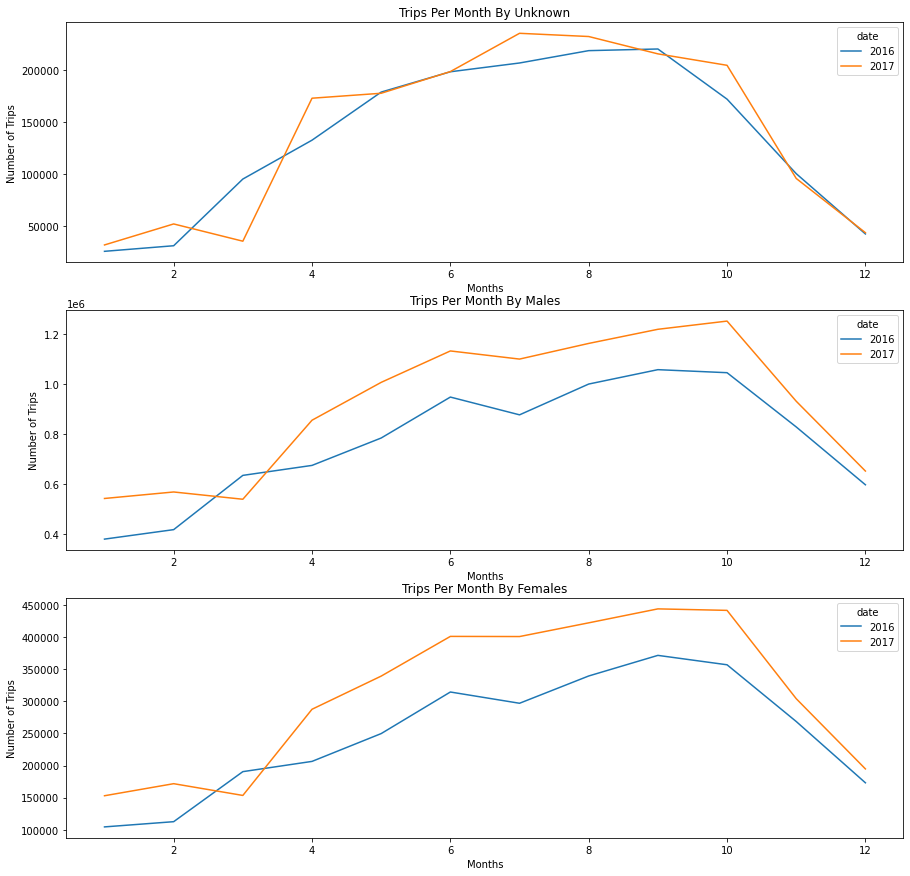

In [4]:
#Calling each of the files and pivoting them into pivot tables for graphing purposes
tripsunknown = pd.read_csv('Trips Per Month - Unknown.csv')
tripsunknown.index = pd.to_datetime(tripsunknown['date'])
tripsunknown.groupby(by=[tripsunknown.index.month, tripsunknown.index.year])['num_trips'].sum()
tripsunknown = pd.pivot_table(tripsunknown, index=tripsunknown.index.month, columns=tripsunknown.index.year,
                    values='num_trips', aggfunc='sum')

tripsgirl = pd.read_csv('Trips Per Month - Female.csv')
tripsgirl.index = pd.to_datetime(tripsgirl['date'])
tripsgirl.groupby(by=[tripsgirl.index.month, tripsgirl.index.year])['num_trips'].sum()
tripsgirl = pd.pivot_table(tripsgirl, index=tripsgirl.index.month, columns=tripsgirl.index.year,
                    values='num_trips', aggfunc='sum')

tripsboy = pd.read_csv('Trips Per Month - Male.csv')
tripsboy.index = pd.to_datetime(tripsboy['date'])
tripsboy.groupby(by=[tripsboy.index.month, tripsboy.index.year])['num_trips'].sum()
tripsboy = pd.pivot_table(tripsboy, index=tripsboy.index.month, columns=tripsboy.index.year,
                    values='num_trips', aggfunc='sum')

#Setting up each subplot in order for easy comparsion
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

tripsunknown.plot(ax=axes[0])
tripsboy.plot(ax=axes[1])
tripsgirl.plot(ax=axes[2])

axes[0].set_title('Trips Per Month By Unknown')
axes[1].set_title('Trips Per Month By Males')
axes[2].set_title('Trips Per Month By Females')

for axes in axes.flat:
    axes.set(xlabel='Months', ylabel='Number of Trips')


### Observations

According to the graphs above, males have taken double the amount of trips compared to females. Based on some articles online, there are some possible reasons for this gender gap. The main reason was due to females having a higher risk aversion, as biking in New York City traffic can fear off many female riders. Another factor discussed was clothing, as some female workers can have their clothes ruined while biking to their destination. 

*Articles Used*

* https://slate.com/human-interest/2014/09/gender-gap-alert-men-ride-bikes-way-more-than-women-do.html

* https://www.bloomberg.com/news/articles/2013-02-19/an-explanation-for-the-gender-gap-in-biking



There are a couple of recommendations that may be useful to help encourage females to utilize the bike systems. One method could be to create a special system for females to find another female rider, this allows them to feel more safe as they bike together. Another marketing campaign that may increase female usage of the bike system could be giving females a discounted rate on certain days of the month to have them test out the bikes, which may entice them to utilize the bike system more.

### Number of Trips on Given Hour

While assessing the number of trips, I can dig deeper into the hours of each day. Each hour had a different amount of trips taken, causing for varying demands in bikes. By comparing what the average duration of each trip was, it can determine which hour was the most popular. This information can be beneficial for the company as it can help them determine when bikes need to be restocked to maintain demand.  

*Queries Used*

SELECT 
extract(hour from starttime) as Hours,
count(*) as TripCounts,
ROUND(avg(cast(tripduration as int) / 60),2) as duration
FROM bike where
(extract(year from starttime) = 2016 or extract(year from starttime) = 2017)
group by extract(hour from starttime)

**What is the trend of the usage of the bike system and trip duration throughout different hours of the day?**

Plotting both the number of trips and the average trip duration can help determine how long riders take to ride their bikes.

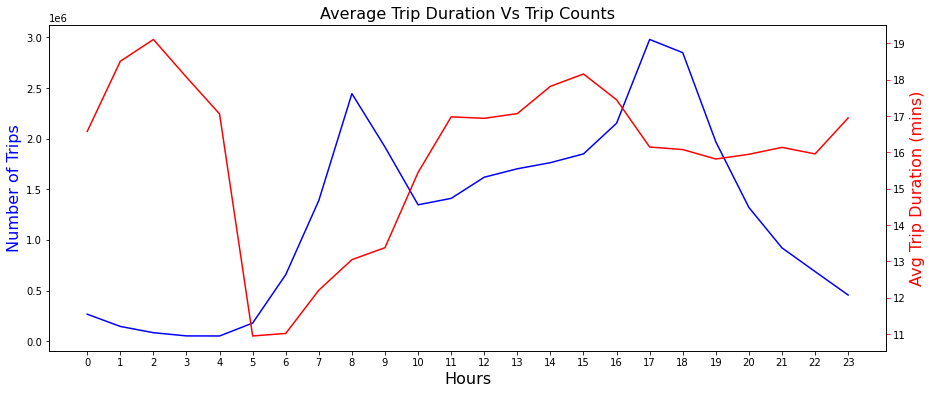

In [5]:
hour = pd.read_csv('PeakHourTrips.csv')

fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = sns.lineplot(x='hours', y='tripcounts', data= hour, color = "blue")
ax1.set_title('Average Trip Duration Vs Trip Counts', fontsize=16)
ax1.set_xlabel('Hours', fontsize=16)
ax1.set_ylabel('Number of Trips', fontsize=16, color= 'Blue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Trip Duration (mins)', fontsize=16, color= 'Red')
ax2 = sns.lineplot(x ='hours' , y = 'duration', data = hour, color = 'red')
ax2.tick_params(axis='y', color= 'red')
plt.xticks(range(0,24))
plt.show()

### Observations

Throughout the day, there was a massive spike in bike usage during the "rush hour" periods of the day. As the graph shows, during morning rush hours there was a significant increase in bike usage between 7:00AM to 8:00AM, and a decrease in usage at 9:00AM. The increase in bike usage during morning rush hour may be due to the commute of office workers that normally work 9-5. Interestingly enough, the average trip duration during morning rush hour was increasingly less compared to the evening rush hour, which may be due to riders needing to get to work quickly. For the evening rush hour, a similar situation occured, but the average ride duration was higher. As most office workers leave at 5:00PM, traffic becomes dense, causing more time required to reach their end destination.

Another important observation was during non rush hour periods, which indicated there were less trips but higher average trip durations. The night period of 12:00AM to 5:00AM showed quite a huge difference between average trip duration and number of trips. During this time period, most riders may be utilizing the bikes for recreational purposes or they may live further from the start station. As soon it became 5:00AM, the average trip duration equaled the number of trips. This indicated the possible beginning of the day for some of riders of New York. Between 9:00AM - 6:00PM, most of the population would be working, but some of the riders could be tourists or could have the day off to explore the city. Many trips may be taken for recreational purposes as there are higher amount of trips with longer average trip duration. The last 7:00PM  - 12:00AM shows most of the riders heading home but enjoying their ride throughout the night

The main point of interest would be when the amount of trips equals the average trip duration. Depending on the time, this can show when more bikes need to be supplied at the stations in order to meet the demands from the riders. Another suggestion could be to move the bikes during off peak hours to evenly distribute them among stations when the number of trips happens to be below the average trip duration. 


## Riders' Ages

New York City is one of the largest metropolitan cities within America, which means they have millions of people of different ages. One of the columns provided was the "birth year". This information can be used to determine which age group we can target to improve the amount of subscription. 


**Which age group of the population uses the Citi Bike system and how many of them are actually subscribers?**

Determining which age groups are actually using the bike system can help the business focus on which population to cater their marketing towards. In this case a bar chart with ranges of ages grouped together was used to determine which age group was to most popular for utilizing the bike system. Some of the birth years were not accurate, as riders could have put fake birth years. For example, one rider documented that they were 180 years old. Many were also null as they could be one time customers as well. Those were filtered out to gain a better sense of the general age population of riders. One change that can be made to improve the data in the future could be making the birth year mandatory for all customers and subscribers. 

*Query Used*

SELECT 
extract(year from now()) - birth_year as Age,
usertype, 
count(user_type) as UserCount
FROM bike
WHERE  (extract(year from now()) - birth_year) < 90
and (extract(year from starttime) = 2016 or extract(year from starttime) = 2017)
group by usertype , ( extract(year from now()) - birth_year)

SELECT 
extract(year from now()) - birth_year as Age,
gender, 
count(*) as tripcount
FROM bike
WHERE  (extract(year from now()) - birth_year) < 90
and (extract(year from starttime) = 2016 or extract(year from starttime) = 2017)
group by usertype , ( extract(year from now()) - birth_year)


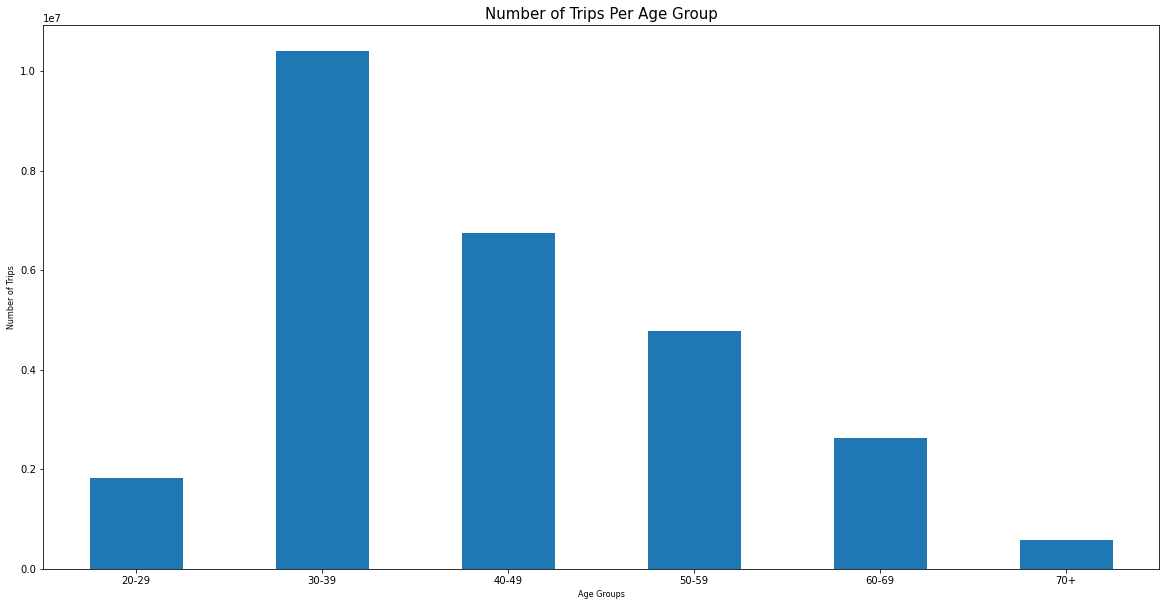

In [6]:
#Reading the csv file and adding a new column to categorize the ages into bins
age = pd.read_csv('Age-UserType-UserCount.csv')
bins= [20,30,40,50,60,70,90]
labels = ['20-29','30-39','40-49','50-59','60-69', '70+']
age['AgeGroup'] = pd.cut(age['age'], bins=bins, labels=labels, right=False)
age_grouped = age.groupby(by= [age.AgeGroup])['usercount'].sum()

#Creating the chart and adjusting formatting
age_grouped_bars = age.groupby(by= [age.AgeGroup])['usercount'].sum().plot(kind = 'bar', figsize = (20,10))
plt.title("Number of Trips Per Age Group", fontsize = 15)
plt.xlabel("Age Groups", fontsize = 8)
plt.ylabel("Number of Trips", fontsize = 8)
plt.tick_params(axis='x', rotation = 0)

### Observations

It seems as though the majority of the trips lie within the "30-39" age range. Most of those riders are possibily office workers utilizing the bike system to commute to work. Additionally, riders in the 30-39 ages are probably able to afford the subscription based model compared to the younger generation. The older generations begin to slowly take less trips as they probably don't commute to work as often, have other priorities which make exercising less important, or they don't have as much physical energy to bike. 

20-29 year olds are normally beginning university or working full time. They may not have the funds available during this time to begin subscribing to the bike system. A way to encourage more bike subscription from the younger population could be to provide a post secondary student discount.

Text(0.5, 1.0, 'Amount of Trips By 70+')

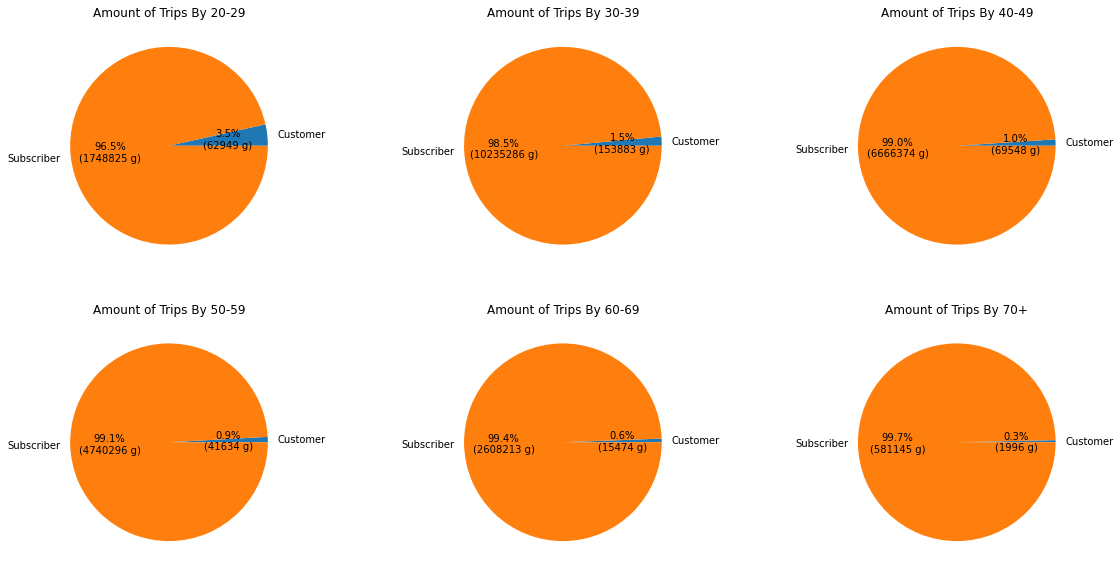

In [7]:
#Creating filtered data for each age group
age_grouped = age.groupby(by= [age.AgeGroup, age.usertype], as_index = False)['usercount'].sum()
age_grouped_2029 = age_grouped[age_grouped['AgeGroup'] == '20-29']
age_grouped_3039 = age_grouped[age_grouped['AgeGroup'] == '30-39']
age_grouped_4049 = age_grouped[age_grouped['AgeGroup'] == '40-49']
age_grouped_5059 = age_grouped[age_grouped['AgeGroup'] == '50-59']
age_grouped_6069 = age_grouped[age_grouped['AgeGroup'] == '60-69']
age_grouped_70 = age_grouped[age_grouped['AgeGroup'] == '70+']

#Create a function to format the percentage and whole number value
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

#Plotting the charts
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
ax[0,0].pie( age_grouped_2029['usercount'], labels = age_grouped_2029['usertype'], autopct=lambda pct: func(pct, age_grouped_2029['usercount']))
ax[0,1].pie( age_grouped_3039['usercount'], labels = age_grouped_3039['usertype'], autopct=lambda pct: func(pct, age_grouped_3039['usercount']))
ax[0,2].pie( age_grouped_4049['usercount'], labels = age_grouped_4049['usertype'], autopct=lambda pct: func(pct, age_grouped_4049['usercount']))
ax[1,0].pie( age_grouped_5059['usercount'], labels = age_grouped_5059['usertype'], autopct=lambda pct: func(pct, age_grouped_5059['usercount']))
ax[1,1].pie( age_grouped_6069['usercount'], labels = age_grouped_6069['usertype'], autopct=lambda pct: func(pct, age_grouped_6069['usercount']))
ax[1,2].pie( age_grouped_70['usercount'], labels = age_grouped_70['usertype'], autopct=lambda pct: func(pct, age_grouped_70['usercount']))

ax[0,0].set_title('Amount of Trips By 20-29')
ax[0,1].set_title('Amount of Trips By 30-39')
ax[0,2].set_title('Amount of Trips By 40-49')
ax[1,0].set_title('Amount of Trips By 50-59')
ax[1,1].set_title('Amount of Trips By 60-69')
ax[1,2].set_title('Amount of Trips By 70+')


### Observations

I wanted to break down the analysis further to see which age populations are actually subscribers vs customers. For each age demographic, there are many subscribers for the biking system. That means the subscription model that was in place has some flexiblity. 

Even though the majority of the riders are subscribers, there needs to be a way for the bike system to bring in new customers. Customers are important as they can eventually turn into subscribers if they enjoy the product provided. A way to entice more subscriptions could be giving more events for new customers to try out the system, or even more free trials.

<Figure size 1440x720 with 0 Axes>

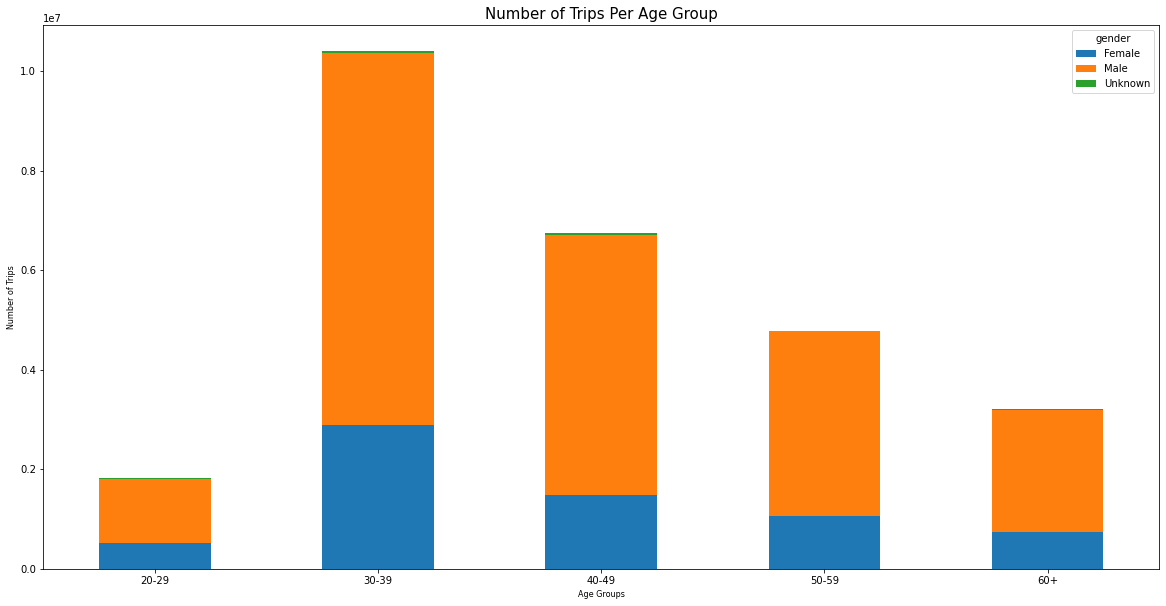

<Figure size 1440x720 with 0 Axes>

In [8]:
age = pd.read_csv('Age-Gender-TripCount.csv')
bins= [20,30,40,50,60,90]
labels = ['20-29','30-39','40-49','50-59','60+']
age['AgeGroup'] = pd.cut(age['age'], bins=bins, labels=labels, right=False)
age['gender'].replace([0,1,2],['Unknown', 'Male','Female'],inplace=True)

age_grouped = age.groupby(by= [age.AgeGroup, age.gender])['tripcount'].sum().unstack().plot(kind = 'bar', stacked = 'True', figsize = (20,10))
plt.title("Number of Trips Per Age Group", fontsize = 15)
plt.xlabel("Age Groups", fontsize = 8)
plt.ylabel("Number of Trips", fontsize = 8)
plt.tick_params(axis='x', rotation = 0)
plt.figure(figsize = (20,10))

### Observations

Another way to break down the age demographic, was to see which genders in each age category are taking trips. As mentioned earlier, the bike system was used more often by males, and this further showcased that each age demographic are mostly males. 

# Station Analysis 

As bikes stations are at major intersections, it would be important to determine which stations need more bikes in stock. Supply of bikes in each station are important to meet the demands of the customers. Thus, determining which station are more popular can help with understanding where more bikes should be stationed. Another factor is determining the stations that do not have as many customers, as this may mean these bikes may need to be relocated to a more popular station.

### Which are the most and least popular stations?

*Query Used*

SELECT
  start_station_name,
  COUNT(*) AS TripCount
FROM bike
GROUP BY
start_station_name
ORDER BY
COUNT(*) desc
limit 10


SELECT
  start_station_name,
  COUNT(*) AS TripCount
FROM bike
GROUP BY
start_station_name
ORDER BY
COUNT(*)
limit 10


Text(0, 0.5, 'Number of Trips')

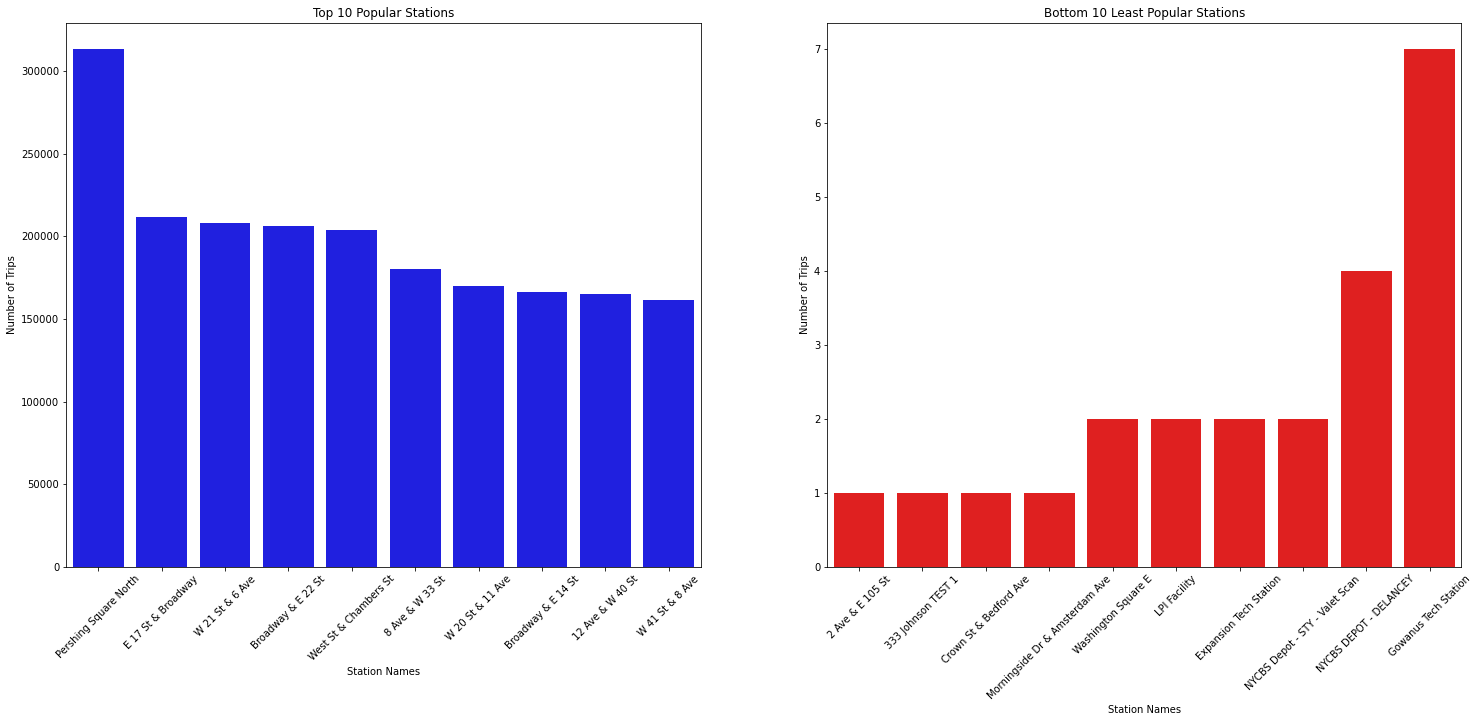

In [9]:
#Reading the CSV files
moststation = pd.read_csv('Most Popular Stations.csv')
leaststation = pd.read_csv('Least Popular Stations.csv')

#Plotting the subcharts for comparsion
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
sns.barplot(ax =ax[0], x='start_station_name', y='tripcount', data= moststation, color = 'blue')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title("Top 10 Popular Stations")
ax[0].set_xlabel("Station Names")
ax[0].set_ylabel("Number of Trips")
sns.barplot(ax = ax[1], x='start_station_name', y='tripcount', data= leaststation, color = 'red')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title("Bottom 10 Least Popular Stations")
ax[1].set_xlabel("Station Names")
ax[1].set_ylabel("Number of Trips")

### Observations

The most popular station was "Pershing Square North" with around 30,000 rides. Based on Google Maps it seems like this square is near the center of numerous public attractions. Therefore many riders may get off at the nearby subway stations in order to bike the rest of their commute. Major landmarks or attractions near the bike station are possiblities on why these bike stations happen to be more popular. When assessing the bike stations located near the downtown core, where the majority of the offices are located, we also see an increase in the amount of trips, which possibily is due to riders utilizing the bike system to commute towards work.

On the other hand, "2 Ave and E 10S St" seems to not have many major landmarks or office buildings nearby. The nearby subway stations don't appear to be as accessible to that bike stations, thus it would be more difficult to entice a rider to utilize this bike station. 

Overall, business can make the decision to add more bikes in stock to the top 10 stations in order to keep up the demand for more riders. A recommendation for business could be relocating the least popular stations to another more populated intersection as the amount of rides in these least popular stations may not be profitable. 

### Conclusion

Overall, these metrics provided great insights to how the NYC Citi bike system. I learnt that factors such as time, age, gender, location all matter into the usage of the bike system. Business can target the right demographic with the promotions can assist in enticing new riders to sign up for the Citi bike system.

Thank you for reading my analysis of the NYC Citi bike system!